<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Deep_Learning/blob/main/2348505_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
import scipy as sp
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras import backend as K
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preparation**

---

1. Acquire a dataset comprising images of animals from various species, categorized into the five specified classes.

In [3]:
base_path = '/content/drive/MyDrive/DATASETS/Lab5 Dataset'
cat_path = os.path.join(base_path, 'cat')
dog_path = os.path.join(base_path, 'dog')
goldfish_path = os.path.join(base_path, 'goldfish')
lizard_path = os.path.join(base_path, 'lizard')
woodpecker_path = os.path.join(base_path, 'woodpecker')

In [4]:
print("Files in 'cat' folder:", os.listdir(cat_path))
print("Files in 'dog' folder:", os.listdir(dog_path))
print("Files in 'goldfish' folder:", os.listdir(goldfish_path))
print("Files in 'lizard' folder:", os.listdir(lizard_path))
print("Files in 'woodpecker' folder:", os.listdir(woodpecker_path))

Files in 'cat' folder: ['00357563a7.jpg', '094ac674a9.jpg', '0b54dde5f5.jpg', '11883c3dd8.jpg', '057e6db146.jpg', '0d0d6d90d8.jpg', '087d293433.jpg', '0c3d04bcf5.jpg', '124eecb74f.jpg', '029c926ce9.jpg', '0cfaf08fce.jpg', '15b23c04b7.jpg', '67dc417509.jpg', '4bd8b7789f.jpg', '5e07a0666d.jpg', '5a5cdbdc6b.jpg', '4c6ff6dae0.jpg', '32cd00f171.jpg', '3f3a2aaef2.jpg', '4815f8dfaa.jpg', '66548aefad.jpg', '1f016e1910.jpg', '34fb30ecc5.jpg', '354bb2acdf.jpg', '5aaea25f27.jpg', '612c521481.jpg', '3321ec48a8.jpg', '2a40de8365.jpg', '31ae8d36b6.jpg', '2d7dc1ddb5.jpg', '6296ca5ccf.jpg', '39ae72da61.jpg', '636b432421.jpg', '46af339620.jpg', '578d493138.jpg', '6128bd1a84.jpg', '1a2dce7848.jpg', '8af49688fa.jpg', '76273ddb00.jpg', '9e020b77ac.jpg', '9293137b5d.jpg', '71756f7bd0.jpg', '6fe978c917.jpg', '9d21019336.jpg', '72c56919f9.jpg', '84db062d1f.jpg', '81b58d7d07.jpg', '9fd544a838.jpg', '6a5e9eac29.jpg', '730d6a8791.jpg', '83e8a824a2.jpg', '8aefee4c2c.jpg', '7f923c6676.jpg', '6edc079fcf.jpg', '71c

**Inpur Augmentation**

---

1. Preprocess the images by resizing them to a uniform size, applying normalization, and partitioning them into training, validation, and test sets.
2. Implement input augmentation techniques, such as random rotations, translations, flips, and changes in scale or brightness, to augment the training dataset and enhance the model's ability to generalize.

In [51]:
base_path = '/content/drive/MyDrive/DATASETS/Lab5 Dataset'
train = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,brightness_range=[1.0,2.0],rotation_range=20,validation_split=0.2)
validation = ImageDataGenerator(rescale=1/255, validation_split=0.2)
test = ImageDataGenerator(rescale = 1/255,validation_split=0.2)
train_generator = train.flow_from_directory(base_path,target_size=(150, 150),batch_size=32,class_mode='categorical',subset='training')
validation_generator = validation.flow_from_directory(base_path,target_size=(150, 150),batch_size=32,class_mode='categorical',subset='validation')
test_generator = test.flow_from_directory(base_path,target_size=(150,150),batch_size=32,class_mode = 'categorical',shuffle=False)
print("Class indices:")
print(train_generator.class_indices)

Found 240 images belonging to 5 classes.
Found 60 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Class indices:
{'cat': 0, 'dog': 1, 'goldfish': 2, 'lizard': 3, 'woodpecker': 4}


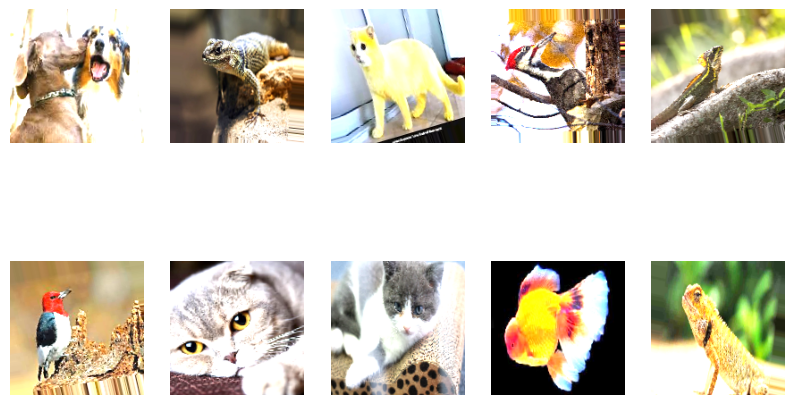

In [6]:
#Visualize some of the augmented images
x_batch, y_batch = next(train_generator)
fig, axs = plt.subplots(2, 5,figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_batch[i])
    ax.axis('off')
plt.show()

**Model Architecture**

---

1. Devise a CNN architecture tailored for image classification tasks, incorporating convolutional layers, pooling layers, fully connected layers, and suitable activation functions.

2. Embed batch normalization layers after convolutional layers to expedite model convergence and improve performance.

3. Train the CNN model using an appropriate optimizer (e.g., Adam) and a relevant loss function (e.g., categorical cross-entropy).

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

**Training Strategy**

---
1. Monitor the training process by tracking essential metrics like training and validation accuracy, loss, and any other pertinent metrics.

In [8]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples //32,epochs=100,validation_data=validation_generator,validation_steps=validation_generator.samples //32)
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Epoch 1/100
7/7 [==============================] - 100s 16s/step - loss: 9.6157 - accuracy: 0.3125 - val_loss: 1.5863 - val_accuracy: 0.3750
Epoch 2/100
7/7 [==============================] - 15s 2s/step - loss: 4.4160 - accuracy: 0.5096 - val_loss: 3.6845 - val_accuracy: 0.1250
Epoch 3/100
7/7 [==============================] - 17s 2s/step - loss: 2.5466 - accuracy: 0.5625 - val_loss: 6.6318 - val_accuracy: 0.2500
Epoch 4/100
7/7 [==============================] - 15s 2s/step - loss: 1.6273 - accuracy: 0.6154 - val_loss: 13.1635 - val_accuracy: 0.1250
Epoch 5/100
7/7 [==============================] - 15s 2s/step - loss: 0.8815 - accuracy: 0.7260 - val_loss: 17.9313 - val_accuracy: 0.1250
Epoch 6/100
7/7 [==============================] - 20s 2s/step - loss: 0.9323 - accuracy: 0.7548 - val_loss: 21.2062 - val_accuracy: 0.1562
Epoch 7/100
7/7 [==============================] - 16s 2s/step - loss: 0.6799 - accuracy: 0.7500 - val_loss: 23.7191 - val_accuracy: 0.1875
Epoch 8/100
7/7 [====

**Predictions**

In [49]:
test_generator

It's a dog


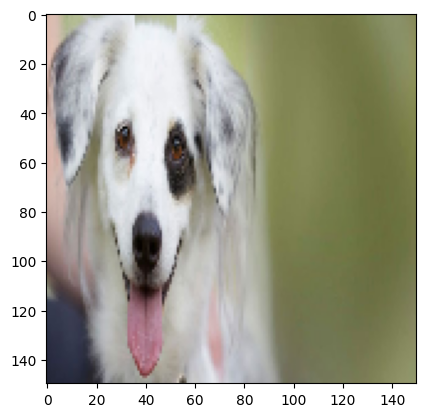

In [45]:
x_batch, y_batch = next(test_generator)
list = [*range(1, 10, 1)]
a = random.choice(list)
plt.imshow(x_batch[a])
pred = test_generator.labels[a]
if pred == 0:
  print("It's a cat")
elif pred == 1:
  print("It's a dog")
elif pred == 2:
  print("It's a goldfish")
elif pred == 3:
  print("It's a lizard")
else:
  print("It's a woodpecker")

In [47]:
y_pred = np.argmax(model.predict(test_generator), axis=-1)

10/10 [==============================] - 15s 2s/step


In [54]:
classes = dict(zip(test_generator.class_indices.values(), test_generator.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(test_generator.labels))),
                            "Test Labels" : test_generator.labels,
                            "Test Classes" : [classes[i] for i in test_generator.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_generator.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_generator), axis = 1))]
                           })

In [53]:
Predictions.sample(10)

,Image Index,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
36,36,0,cat,0,cat,cat/67dc417509.jpg,1.000000
231,231,3,lizard,3,lizard,lizard/8f116fd089.jpg,1.000000
73,73,1,dog,1,dog,dog/22f99b4396.jpg,0.999950
206,206,3,lizard,3,lizard,lizard/40ce1ae343.jpg,1.000000
119,119,1,dog,1,dog,dog/9efd18dd6c.jpg,0.999999
75,75,1,dog,1,dog,dog/26c7056eda.jpg,0.999999
87,87,1,dog,4,woodpecker,dog/4db9316411.jpg,0.957918
202,202,3,lizard,3,lizard,lizard/35f5362fc9.jpg,0.999998
227,227,3,lizard,3,lizard,lizard/89fcf3e801.jpg,1.000000
299,299,4,woodpecker,4,woodpecker,woodpecker/9e74328e36.jpg,1.000000


**Visualization**

---

1. Utilize visualization tools such as TensorBoard or equivalent libraries to visualize the CNN model's architecture and parameters.
2. Create visualizations, such as training/validation accuracy and loss curves, confusion matrices, and class activation maps, to facilitate the interpretation of model predictions and evaluation of performance.

**Training/Validation Accuracy and Loss Curves**

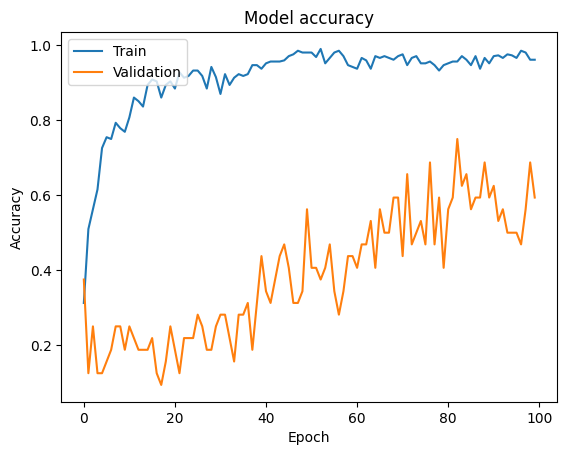

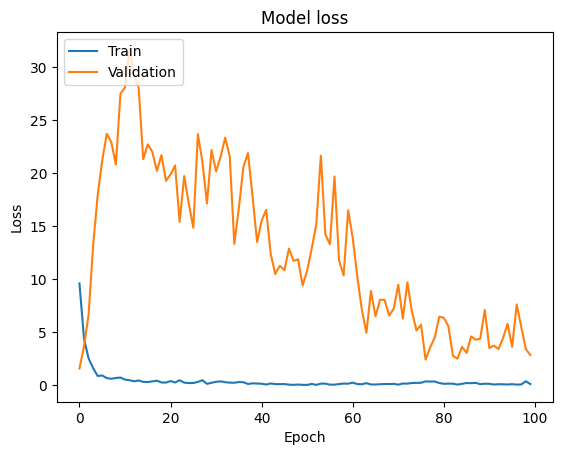

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Confusion Matrix**

10/10 [==============================] - 15s 1s/step


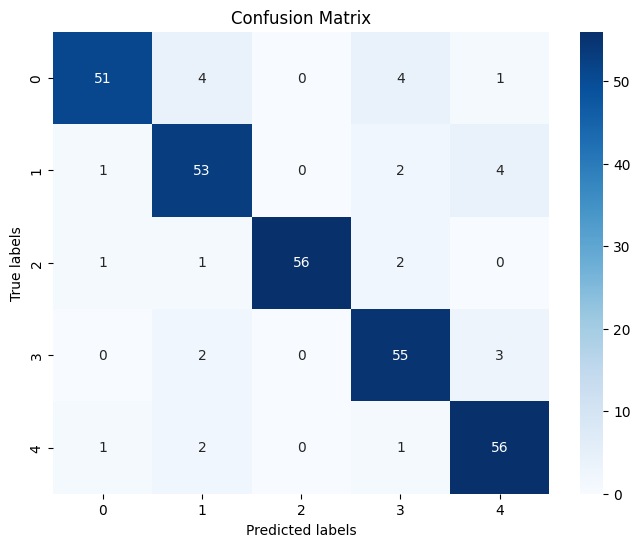

In [14]:
y_true = test_generator.classes
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Class Activation Maps**

In [ ]:
gap_model = model.layers[-1].get_weights()[0]
gap_model.shape

In [ ]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

In [ ]:
def show_cam(image_value, features, results):
  '''
  Displays the class activation map of an image

  Args:
    image_value (tensor) -- preprocessed input image with size 300 x 300
    features (array) -- features of the image, shape (1, 37, 37, 128)
    results (array) -- output of the sigmoid layer
  '''

  # there is only one image in the batch so we index at `0`
  features_for_img = features[0]
  prediction = results[0]

  # there is only one unit in the output so we get the weights connected to it
  class_activation_weights = gap_weights[:,0]

  # upsample to the image size
  class_activation_features = sp.ndimage.zoom(features_for_img, (150/37, 150/37, 1), order=2)
  #spline interpolation of order = 2 (G search)

  # compute the intensity of each feature in the CAM
  cam_output  = np.dot(class_activation_features,class_activation_weights)

  # visualize the results
  print(f'sigmoid output: {results}')
  print(f"prediction: {'dog' if round(results[0][0]) else 'cat'}")
  plt.figure(figsize=(8,8))
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_value), alpha=0.5)
  plt.show()

In [ ]:
!wget -O cat1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/June_odd-eyed-cat.jpg/1106px-June_odd-eyed-cat.jpg

In [ ]:
# utility function to preprocess an image and show the CAM
def convert_and_classify(image):

  # load the image
  img = cv2.imread(image)

  # preprocess the image before feeding it to the model
  img = cv2.resize(img, (150,150)) / 255.0

  # add a batch dimension because the model expects it
  tensor_image = np.expand_dims(img, axis=0)

  # get the features and prediction
  features,results = cam_model.predict(tensor_image)

  # generate the CAM
  show_cam(tensor_image, features, results)

convert_and_classify('cat1.jpg')